In [82]:
# !sudo apt-get update
# !sudo apt-get install python3-rtree
# !sudo pip3 install -U geopandas descartes pandas matplotlib
# !sudo pip3 install -U shapely

In [83]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [85]:
!curl 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessType=DOWNLOAD' -o accidents.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  289M    0  289M    0     0  2951k      0 --:--:--  0:01:40 --:--:-- 3105k:--:-- 3057k


In [86]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv("accidents.csv", low_memory=False, dtype='object')

In [87]:
!rm accidents.csv

In [88]:
df['DATETIME'] = df.DATE + ' ' + df.TIME
df.DATETIME = pd.to_datetime(df.DATETIME, format="%m/%d/%Y %H:%M")
#df.TIME = pd.to_datetime(df.TIME, format="%H:%M")
#df.DATE = pd.to_datetime(df.DATE, format="%m/%d/%Y")

In [89]:
df.dtypes

DATE                                     object
TIME                                     object
BOROUGH                                  object
ZIP CODE                                 object
LATITUDE                                 object
LONGITUDE                                object
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                object
NUMBER OF PERSONS KILLED                 object
NUMBER OF PEDESTRIANS INJURED            object
NUMBER OF PEDESTRIANS KILLED             object
NUMBER OF CYCLIST INJURED                object
NUMBER OF CYCLIST KILLED                 object
NUMBER OF MOTORIST INJURED               object
NUMBER OF MOTORIST KILLED                object
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [90]:
df.BOROUGH = pd.Categorical(df.BOROUGH)
df['ZIP CODE'] = pd.Categorical(df['ZIP CODE'])

In [91]:
df.LATITUDE = pd.to_numeric(df.LATITUDE)
df.LONGITUDE  = pd.to_numeric(df.LONGITUDE)

In [92]:
df.dtypes

DATE                                     object
TIME                                     object
BOROUGH                                category
ZIP CODE                               category
LATITUDE                                float64
LONGITUDE                               float64
LOCATION                                 object
ON STREET NAME                           object
CROSS STREET NAME                        object
OFF STREET NAME                          object
NUMBER OF PERSONS INJURED                object
NUMBER OF PERSONS KILLED                 object
NUMBER OF PEDESTRIANS INJURED            object
NUMBER OF PEDESTRIANS KILLED             object
NUMBER OF CYCLIST INJURED                object
NUMBER OF CYCLIST KILLED                 object
NUMBER OF MOTORIST INJURED               object
NUMBER OF MOTORIST KILLED                object
CONTRIBUTING FACTOR VEHICLE 1            object
CONTRIBUTING FACTOR VEHICLE 2            object
CONTRIBUTING FACTOR VEHICLE 3           

In [93]:
df['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], downcast='unsigned')

In [94]:
df['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)
df['NUMBER OF PERSONS KILLED']  = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], downcast='unsigned')

In [95]:
df['NUMBER OF PEDESTRIANS INJURED'] = pd.to_numeric(df['NUMBER OF PEDESTRIANS INJURED'], downcast='unsigned') 

In [96]:
df['NUMBER OF PEDESTRIANS KILLED']  = pd.to_numeric(df['NUMBER OF PEDESTRIANS KILLED'], downcast='unsigned')

In [97]:
df['NUMBER OF CYCLIST INJURED']  = pd.to_numeric(df['NUMBER OF CYCLIST INJURED'], downcast='unsigned')
df['NUMBER OF CYCLIST KILLED']  = pd.to_numeric(df['NUMBER OF CYCLIST KILLED'] , downcast='unsigned')
df['NUMBER OF MOTORIST INJURED'] = pd.to_numeric(df['NUMBER OF MOTORIST INJURED'] , downcast='unsigned')
df['NUMBER OF MOTORIST KILLED']  = pd.to_numeric(df['NUMBER OF MOTORIST KILLED'], downcast='unsigned')

In [98]:
df.head(5)

DATE  TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  11/16/2018  0:10  MANHATTAN    10010  40.742275 -73.988914   
1  11/16/2018  0:40        NaN      NaN  40.762720 -73.728170   
2  11/16/2018  0:45   BROOKLYN    11211  40.710197 -73.958430   
3  11/16/2018  1:00      BRONX    10454  40.803555 -73.911840   
4  11/16/2018  1:00   BROOKLYN    11221  40.694923 -73.915565   

                  LOCATION                    ON STREET NAME  \
0  (40.742275, -73.988914)  5 AVENUE                           
1    (40.76272, -73.72817)  LONG ISLAND EXPRESSWAY             
2   (40.710197, -73.95843)  BORINQUEN PLACE                    
3   (40.803555, -73.91184)  EAST 137 STREET                    
4  (40.694923, -73.915565)  WILSON AVENUE                      

  CROSS STREET NAME OFF STREET NAME         ...          \
0          BROADWAY             NaN         ...           
1               NaN             NaN         ...           
2  HAVEMEYER STREET             NaN         ...           
3     WILLOW AVENUE             NaN         ...           
4   PALMETTO STREET             NaN         ...           

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  UNIQUE KEY  \
0                            NaN     4021880   
1                            NaN     4021727   
2                            NaN     4021791   
3                            NaN     4021878   
4                            NaN     4021848   

                   VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
0  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   
1                                Sedan                        Pick-up Truck   
2                                 Taxi                                 Taxi   
3                    Garbage or Refuse  Station Wagon/Sport Utility Vehicle   
4  Station Wagon/Sport Utility Vehicle  Station Wagon/Sport Utility Vehicle   

   VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
0                  NaN                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2                  NaN                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

             DATETIME  
0 2018-11-16 00:10:00  
1 2018-11-16 00:40:00  
2 2018-11-16 00:45:00  
3 2018-11-16 01:00:00  
4 2018-11-16 01:00:00  

[5 rows x 30 columns]

In [99]:
df['CONTRIBUTING FACTOR VEHICLE 1'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 1'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 2'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 2'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 3'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 3'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 4'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 4'].str.upper())
df['CONTRIBUTING FACTOR VEHICLE 5'] = pd.Categorical(df['CONTRIBUTING FACTOR VEHICLE 5'].str.upper())
df['VEHICLE TYPE CODE 1'] = pd.Categorical(df['VEHICLE TYPE CODE 1'].str.upper())
df['VEHICLE TYPE CODE 2'] = pd.Categorical(df['VEHICLE TYPE CODE 2'].str.upper())
df['VEHICLE TYPE CODE 3'] = pd.Categorical(df['VEHICLE TYPE CODE 3'].str.upper())
df['VEHICLE TYPE CODE 4'] = pd.Categorical(df['VEHICLE TYPE CODE 4'].str.upper())
df['VEHICLE TYPE CODE 5'] = pd.Categorical(df['VEHICLE TYPE CODE 5'].str.upper())

In [100]:
len(df)

1386002

In [101]:
# Drop the accidents with NULL coordinates.
df = df[~(df.LATITUDE.isnull()) & ~(df.LONGITUDE.isnull())]

In [102]:
len(df)

1149752

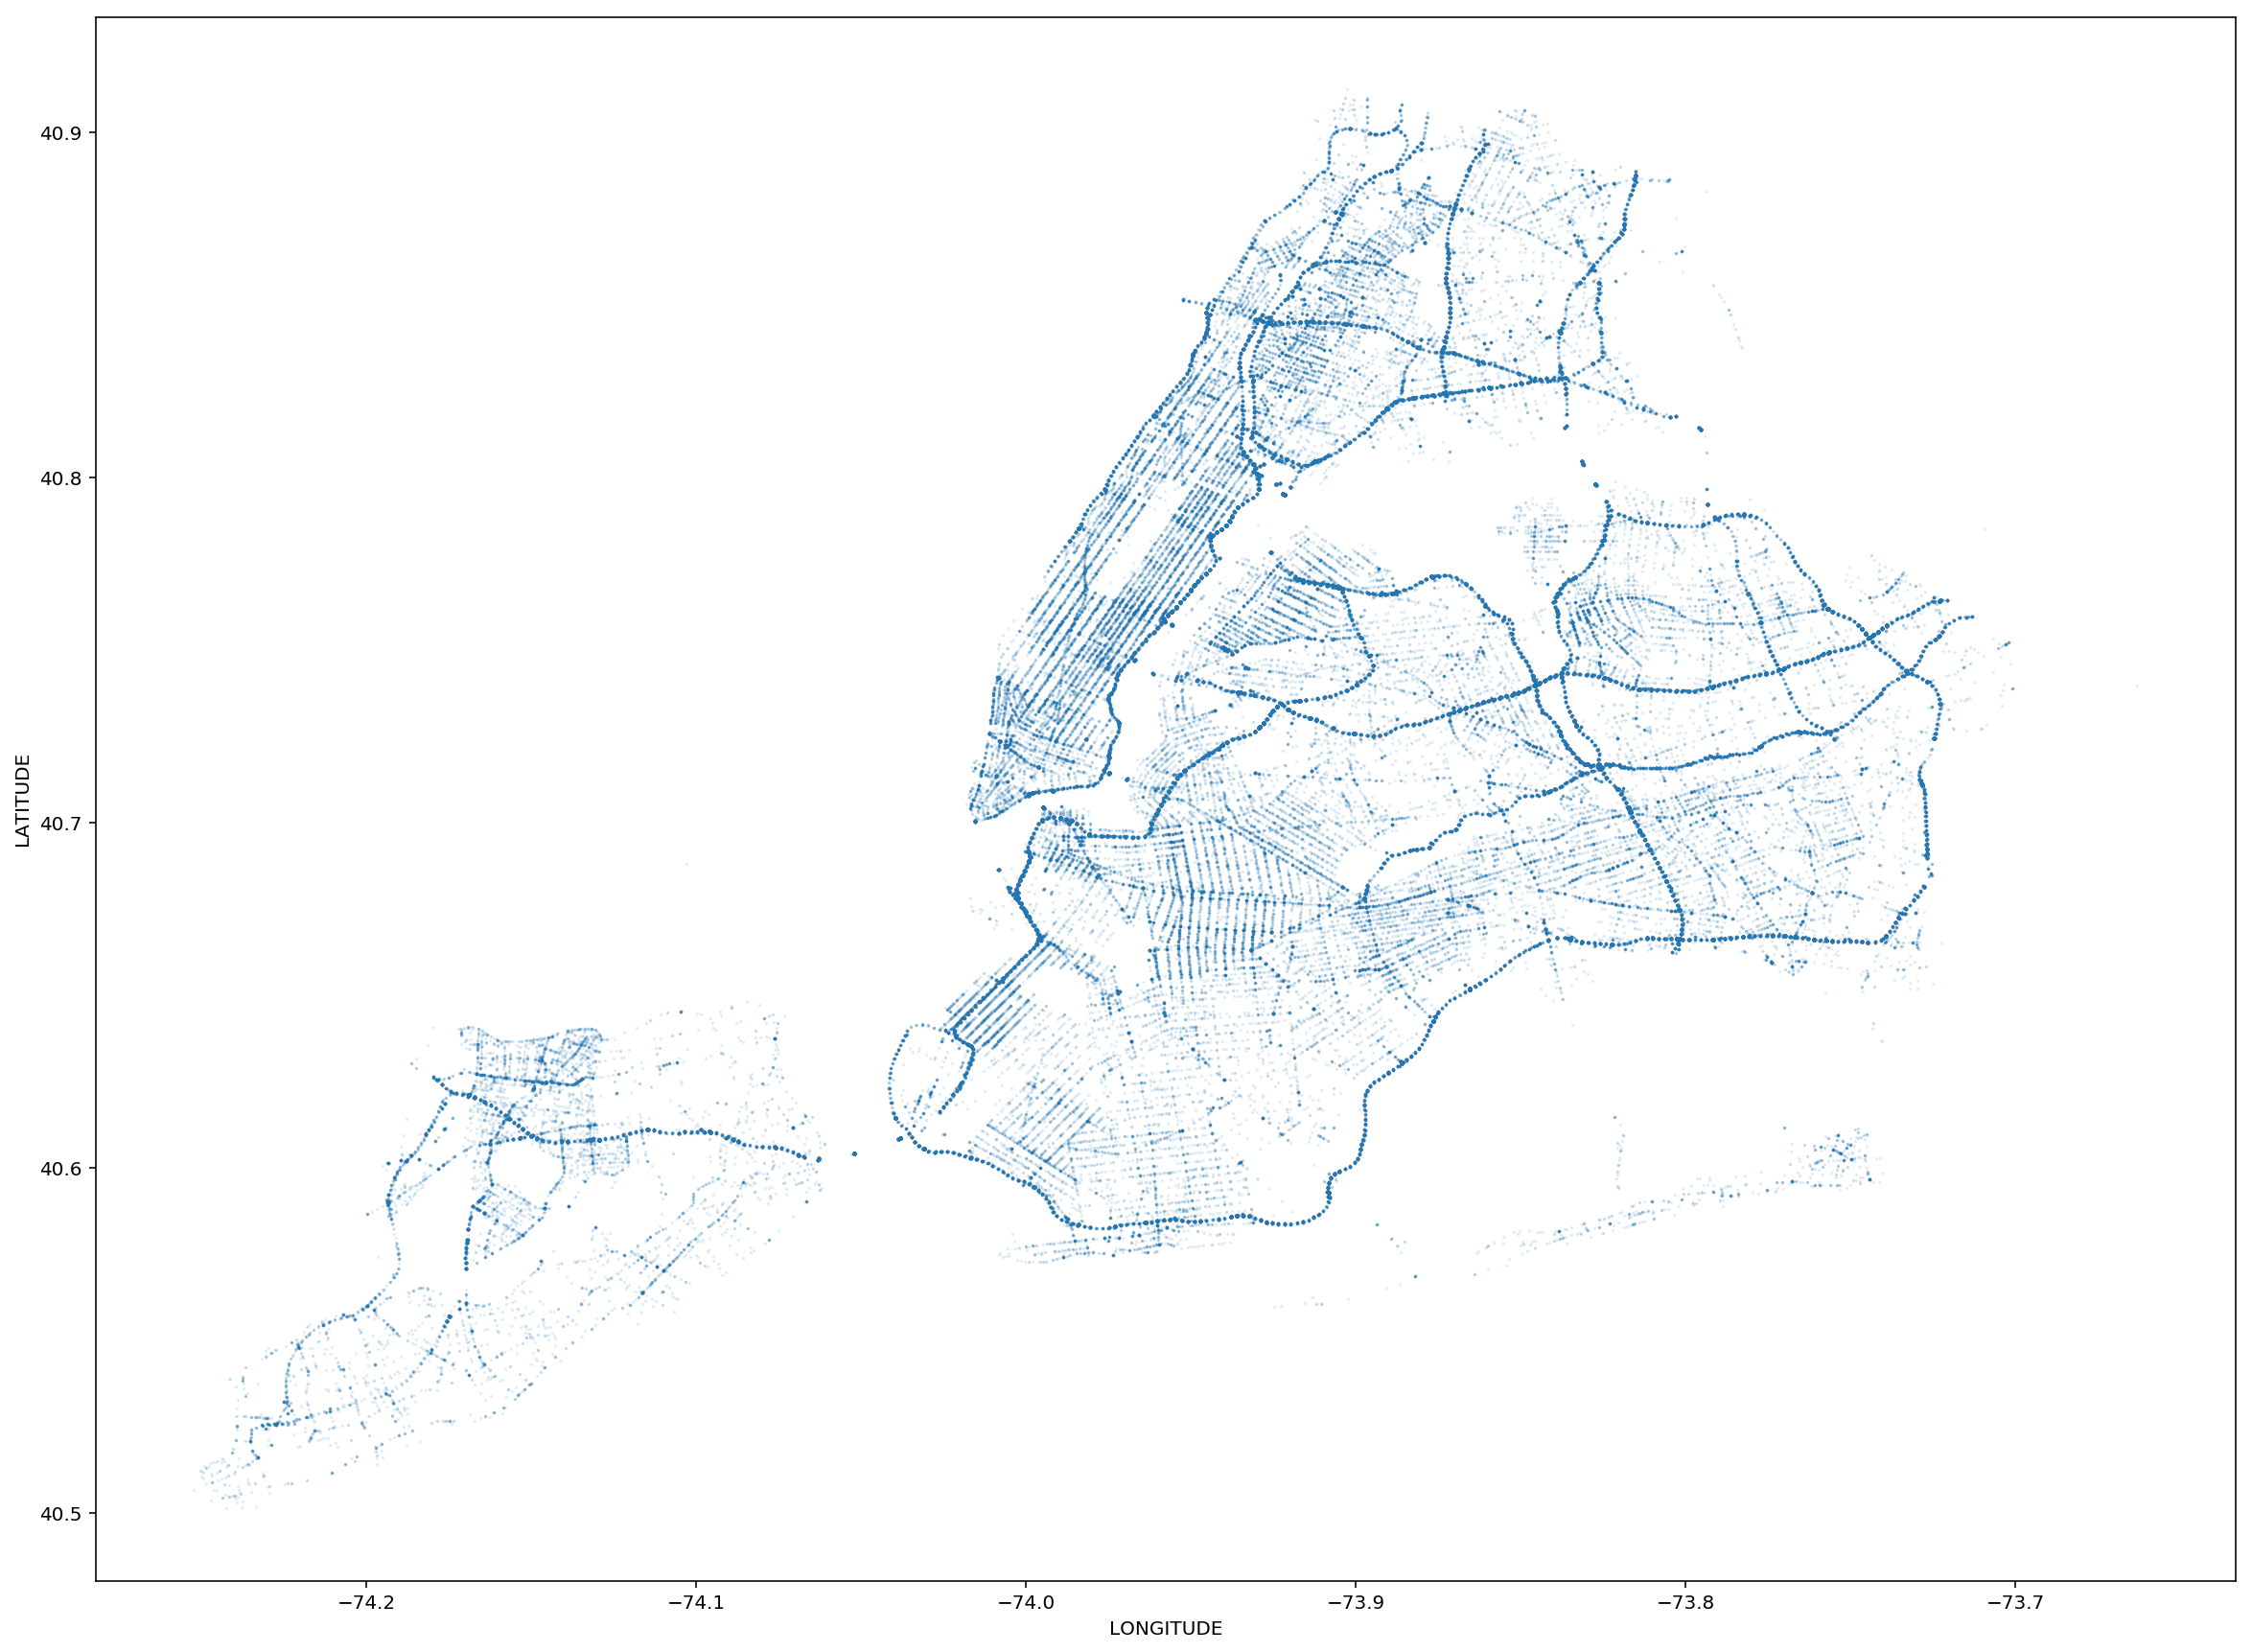

In [103]:
# A map of all the accidents where the BOROUGH is NULL
# Not clear why, but there is a strong bias for highway collissions
# not to have the BOROUGH set. We will fix that later on by using
# the BORO_NAME attribute from the spatial join with the NYC shapefile

# The 'mask' sets rough bound box limits for NYC
mask = (df.LATITUDE > 40) & (df.LATITUDE < 41) & (df.LONGITUDE < -72) & (df.LONGITUDE > -74.5)

df[ df.BOROUGH.isnull() & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(20, 15),
    s=0.5,
    alpha=0.1)

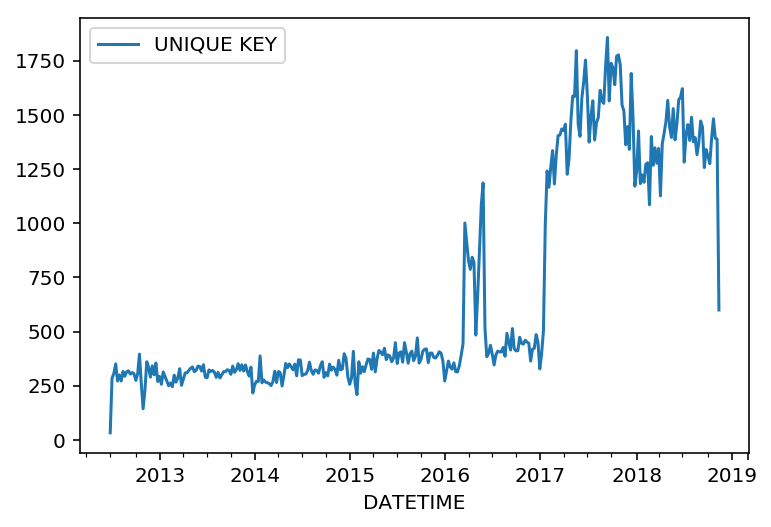

In [133]:
# Check if there is a temporal pattern in the errors

df[ df.BOROUGH.isnull() & mask ].pivot_table(
    index='DATETIME',
    values='UNIQUE KEY',
    aggfunc='count'
).resample('1W').sum().plot()

In [104]:
# We will now perform a spatial join with the NYC shapefile 
# to find the neighborhood for each accident, and also filter out
# automatically all the accidents that have incorrect coordinates
# and/or incorrect BOROUGH listed

In [105]:
# We start by converting the LON/LAT attributes into Shapely "geo-points"
# and convert the resut into a geodataframe so that we can do a spatial join 
from shapely.geometry import Point
df['Coordinates'] = list(zip(df.LONGITUDE, df.LATITUDE))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

In [106]:
shapefile_url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=Shapefile'
df_nyc = gpd.GeoDataFrame.from_file(shapefile_url)

In [107]:
%%time
# Match each accident with a neighborhood. 
# Using inner join, so points outside neighborhoods are dropped out
# Takes ~ 1-2 mins to run
gdf = gpd.sjoin(df_nyc, gdf)

CPU times: user 1min 4s, sys: 8.3 s, total: 1min 13s
Wall time: 1min 17s


In [108]:
len(gdf)

1142777

In [109]:
not_matching = set(df['UNIQUE KEY'].values) - set(gdf['UNIQUE KEY'].values)

In [110]:
len(not_matching)

6975

In [111]:
# These are the entries that we could filter out with a simple mask
nm1 = df[ df['UNIQUE KEY'].isin(not_matching) & ~mask ]
nm1.head()

DATE   TIME   BOROUGH ZIP CODE  LATITUDE  LONGITUDE    LOCATION  \
6935  11/04/2018   1:01       NaN      NaN       0.0        0.0  (0.0, 0.0)   
6940  11/04/2018   1:10       NaN      NaN       0.0        0.0  (0.0, 0.0)   
7021  11/04/2018   2:00  BROOKLYN    11221       0.0        0.0  (0.0, 0.0)   
7023  11/04/2018   2:00    QUEENS    11357       0.0        0.0  (0.0, 0.0)   
7589  11/03/2018  23:00  BROOKLYN    11208       0.0        0.0  (0.0, 0.0)   

                        ON STREET NAME CROSS STREET NAME  \
6935  BROOKLYN ROAD                      BROOKLYN AVENUE   
6940  BROADWAY                                       NaN   
7021  CENTRAL AVENUE                    STOCKHOLM STREET   
7023                               NaN               NaN   
7589  ELDERTS LANE                        STANLEY AVENUE   

                               OFF STREET NAME     ...       \
6935                                       NaN     ...        
6940                                       NaN     ...        
7021                                       NaN     ...        
7023  11-05     157 STREET                         ...        
7589                                       NaN     ...        

      CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
6935                            NaN                            NaN   
6940                            NaN                            NaN   
7021                            NaN                            NaN   
7023                            NaN                            NaN   
7589                            NaN                            NaN   

      UNIQUE KEY  VEHICLE TYPE CODE 1                  VEHICLE TYPE CODE 2  \
6935     4013867                SEDAN                                  NaN   
6940     4014121                  BUS                                SEDAN   
7021     4021897                SEDAN                                SEDAN   
7023     4014111                SEDAN  STATION WAGON/SPORT UTILITY VEHICLE   
7589     4013760                SEDAN  STATION WAGON/SPORT UTILITY VEHICLE   

      VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5  \
6935                  NaN                  NaN                  NaN   
6940                  NaN                  NaN                  NaN   
7021                  NaN                  NaN                  NaN   
7023                  NaN                  NaN                  NaN   
7589                  NaN                  NaN                  NaN   

                DATETIME  Coordinates  
6935 2018-11-04 01:01:00  POINT (0 0)  
6940 2018-11-04 01:10:00  POINT (0 0)  
7021 2018-11-04 02:00:00  POINT (0 0)  
7023 2018-11-04 02:00:00  POINT (0 0)  
7589 2018-11-03 23:00:00  POINT (0 0)  

[5 rows x 31 columns]

In [112]:
nm1.LOCATION.value_counts()

(0.0, 0.0)                 342
(40.75837, -201.23706)      92
(40.665226, -32.768513)     11
(40.5606, -74.742)           7
(41.12615, -73.71353)        4
(40.556175, -47.209625)      3
(41.061634, -73.97066)       2
(42.64154, -79.00183)        1
(30.78418, -89.13527)        1
(41.91661, -79.61955)        1
(34.783634, -86.76847)       1
(43.344444, -76.2634)        1
(41.258785, -73.99024)       1
(40.854286, -201.35999)      1
(41.34796, -73.96965)        1
Name: LOCATION, dtype: int64

In [113]:
# These are the entries that are not matching with a neighborhood
# but are within the NYC boundaries.
nm2 = df[ df['UNIQUE KEY'].isin(not_matching) & mask ]
nm2.head()

DATE   TIME BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
784   11/14/2018  19:30     NaN      NaN  40.765297 -73.839670   
952   11/14/2018   9:15     NaN      NaN  40.851555 -73.952446   
3012  11/10/2018  23:40     NaN      NaN  40.727776 -73.929020   
3532  11/09/2018  18:15     NaN      NaN  40.727660 -73.929380   
3559  11/09/2018  18:40     NaN      NaN  40.755222 -73.961350   

                     LOCATION                    ON STREET NAME  \
784    (40.765297, -73.83967)  VAN WYCK EXPWY                     
952   (40.851555, -73.952446)  CROSS BRONX EXPY                   
3012   (40.727776, -73.92902)  BROOKLYN QUEENS EXPRESSWAY         
3532    (40.72766, -73.92938)  BROOKLYN QUEENS EXPRESSWAY         
3559   (40.755222, -73.96135)  FDR DRIVE                          

     CROSS STREET NAME OFF STREET NAME                  ...                   \
784                NaN             NaN                  ...                    
952                NaN             NaN                  ...                    
3012               NaN             NaN                  ...                    
3532               NaN             NaN                  ...                    
3559               NaN             NaN                  ...                    

      CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
784                             NaN                            NaN   
952                             NaN                            NaN   
3012                            NaN                            NaN   
3532                            NaN                            NaN   
3559                            NaN                            NaN   

      UNIQUE KEY                  VEHICLE TYPE CODE 1  \
784      4021400  STATION WAGON/SPORT UTILITY VEHICLE   
952      4021160                                SEDAN   
3012     4018210  STATION WAGON/SPORT UTILITY VEHICLE   
3532     4019165                                SEDAN   
3559     4017739                                SEDAN   

                      VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3  \
784                                  TAXI                  NaN   
952                  TRACTOR TRUCK DIESEL                  NaN   
3012                                SEDAN                  NaN   
3532                 TRACTOR TRUCK DIESEL                  NaN   
3559  STATION WAGON/SPORT UTILITY VEHICLE                  NaN   

      VEHICLE TYPE CODE 4  VEHICLE TYPE CODE 5            DATETIME  \
784                   NaN                  NaN 2018-11-14 19:30:00   
952                   NaN                  NaN 2018-11-14 09:15:00   
3012                  NaN                  NaN 2018-11-10 23:40:00   
3532                  NaN                  NaN 2018-11-09 18:15:00   
3559                  NaN                  NaN 2018-11-09 18:40:00   

                               Coordinates  
784            POINT (-73.83967 40.765297)  
952   POINT (-73.95244599999999 40.851555)  
3012  POINT (-73.92901999999999 40.727776)  
3532   POINT (-73.92938000000001 40.72766)  
3559           POINT (-73.96135 40.755222)  

[5 rows x 31 columns]

In [114]:
nm2.LOCATION.value_counts().head(10)

(40.608757, -74.038086)     584
(40.798256, -73.82744)      405
(40.604153, -74.05198)      394
(40.704422, -73.99491)      305
(40.727873, -73.9291223)    150
(40.604313, -74.05208)      122
(40.75834, -73.95775)       119
(40.814075, -73.79548)      112
(40.714527, -73.97481)      112
(40.7769, -73.9413)         110
Name: LOCATION, dtype: int64

In [115]:
nm2['ON STREET NAME'].value_counts().head(10)

VERRAZANO BRIDGE UPPER              434
BRONX WHITESTONE BRIDGE             340
BROOKLYN BRIDGE                     211
VERRAZANO BRIDGE LOWER              138
JAMAICA AVENUE                      104
THROGS NECK BRIDGE                  102
WILLIAMSBURG BRIDGE OUTER ROADWA     96
QUEENS MIDTOWN TUNNEL                96
QUEENSBORO BRIDGE LOWER ROADWAY      77
CROSS BRONX EXPY                     75
Name: ON STREET NAME, dtype: int64

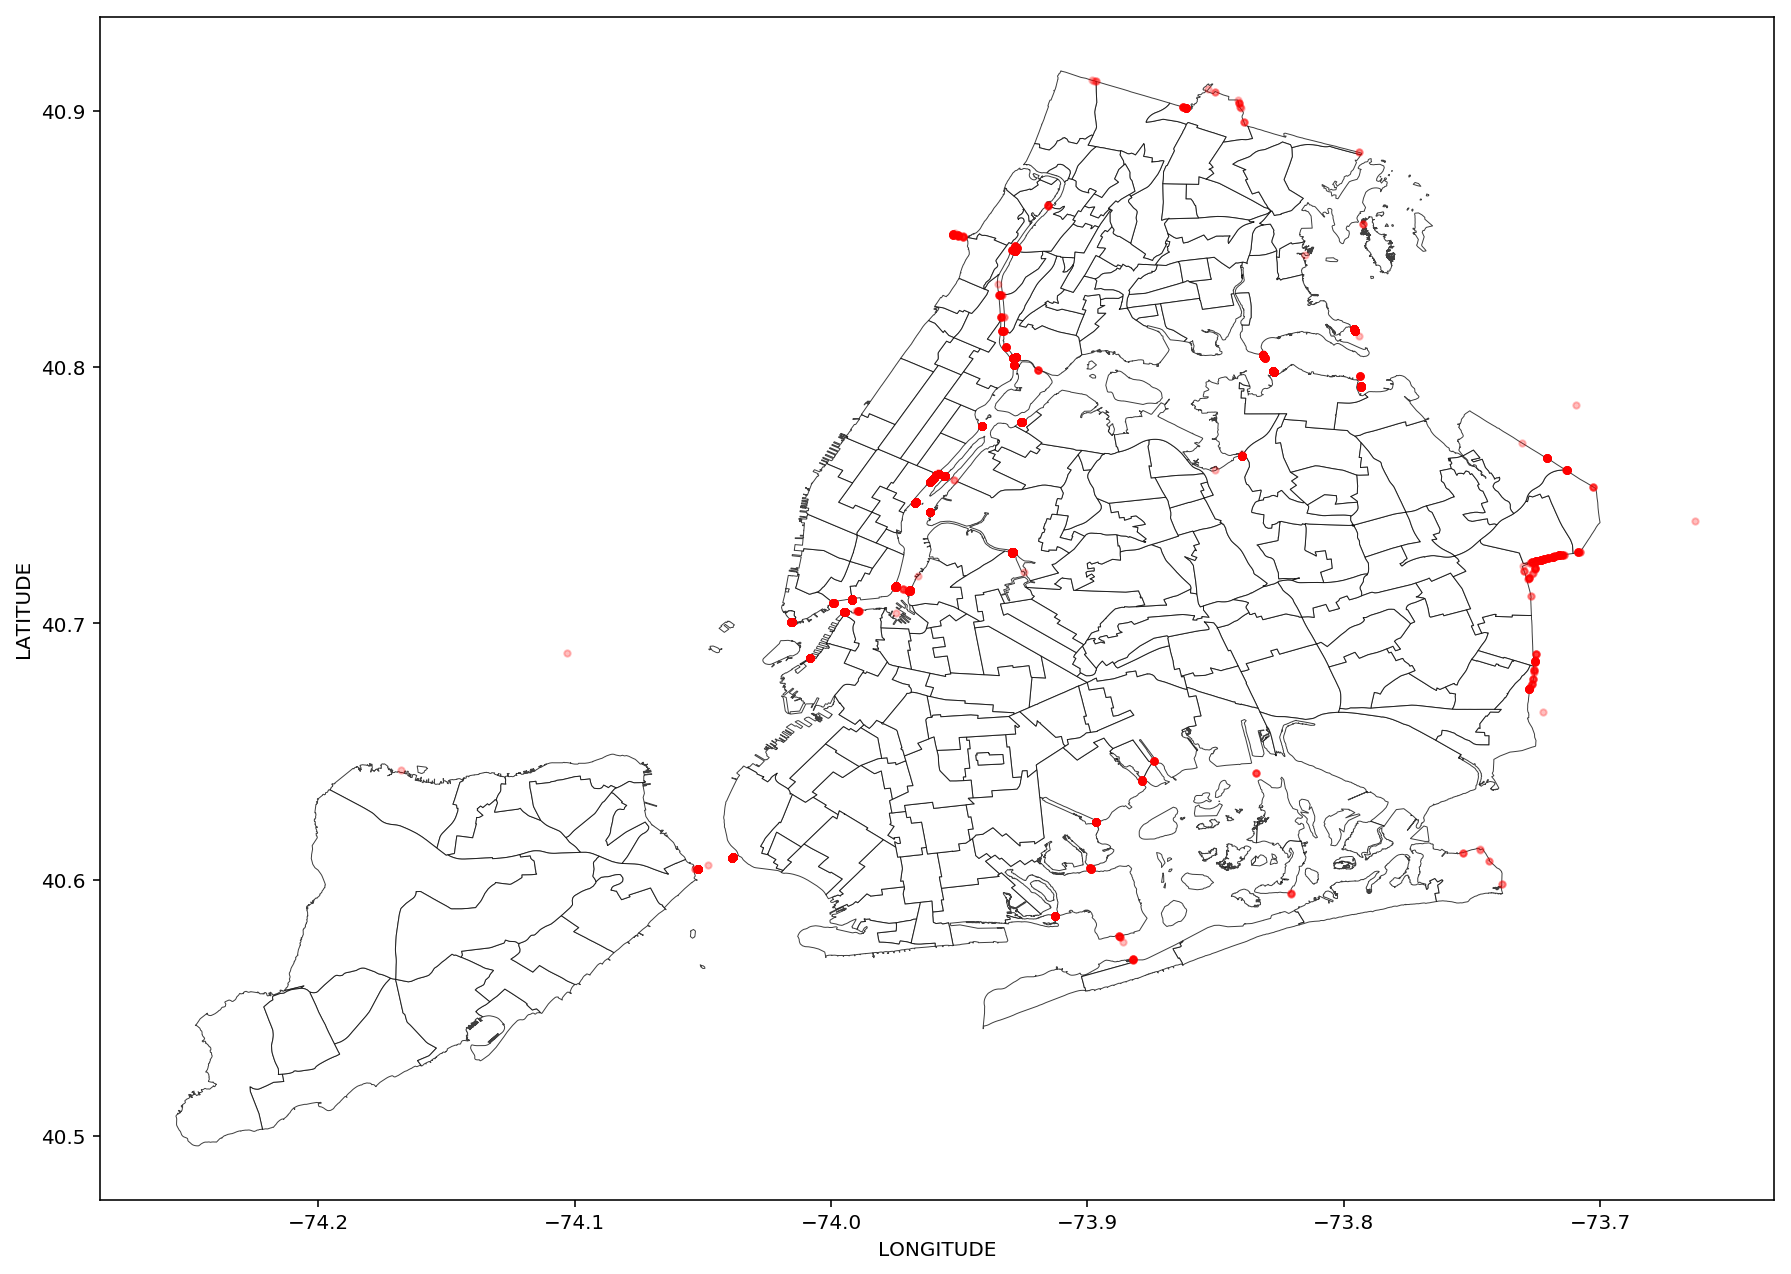

In [116]:
# The plot reveals that these are all bridge accidents
#
# Perhaps we may want to keep them in later versions
#
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 12),
    alpha=0.75)

df[ df['UNIQUE KEY'].isin(not_matching) & mask ].plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

In [117]:
# Code below lists cases where the borough is incorrectly coded based on lon/lat
# TODO: Perhaps also check cases where zipcode is incorrectly coded
errors = gdf [ ~gdf.BOROUGH.isnull() & (gdf.boro_name.str.lower() != gdf.BOROUGH.str.lower()) ]
errors = pd.DataFrame(errors)

In [118]:
len(errors)

1462

In [119]:
errors.LOCATION.value_counts().head(10)

(40.7136, -74.0091)          91
(40.8756831, -73.9083783)    61
(40.7244, -73.9818)          51
(40.7339, -73.9542)          46
(40.8772207, -73.9090451)    33
(40.699531, -73.9110367)     29
(40.7043114, -73.9132917)    20
(40.873642, -73.90797)       20
(40.6999378, -73.9118079)    19
(40.6982557, -73.9087736)    18
Name: LOCATION, dtype: int64

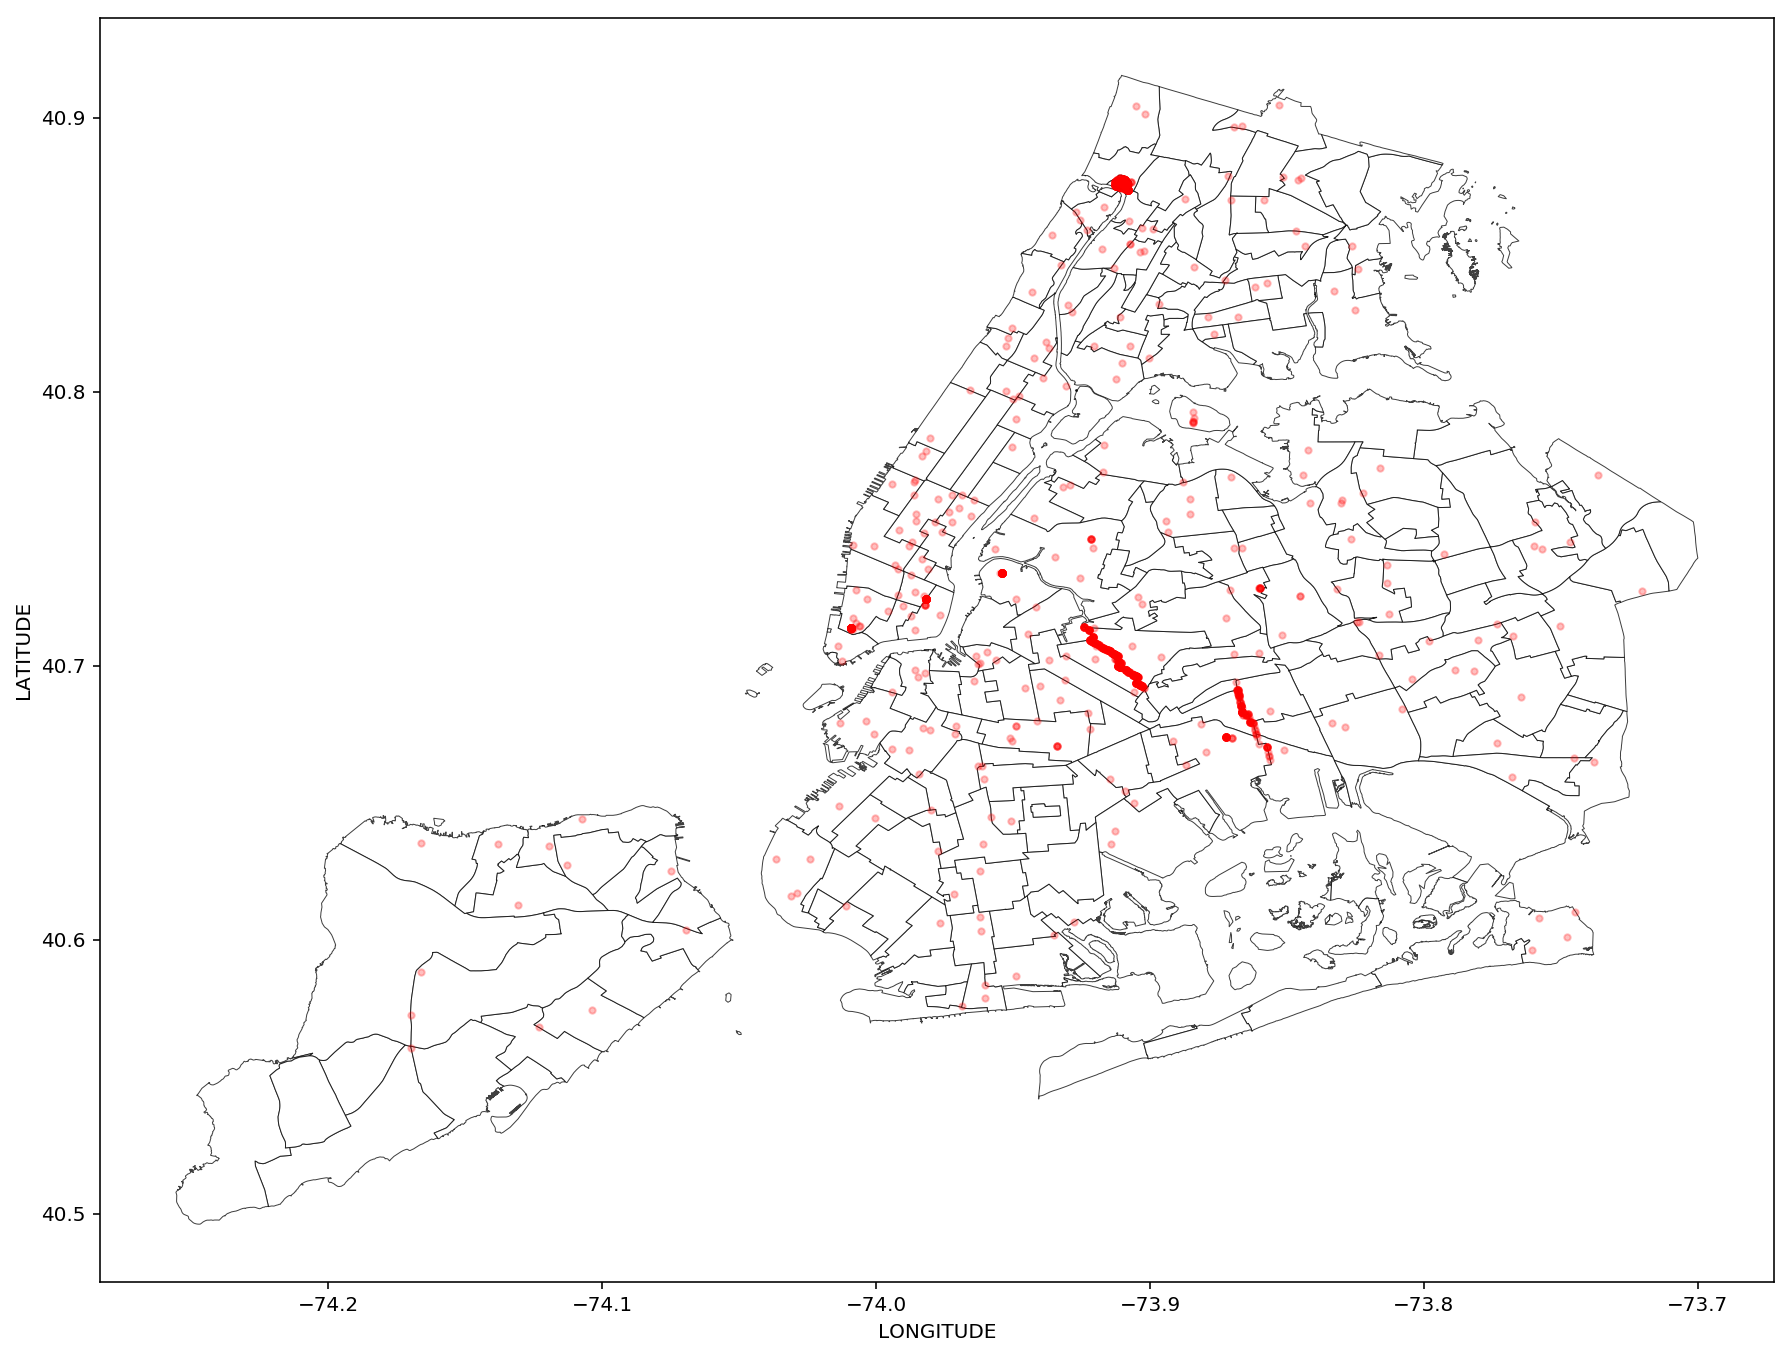

In [120]:
# The plot reveals that most are border issues
# but there are random errors spread throughout the city
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(15, 12),
    alpha=0.75)

errors.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    figsize=(15, 12),
    c='red',
    s=5,
    alpha=0.25, ax=base)

In [122]:
todrop = ['boro_code', 'BOROUGH', 'county_fip', 'ntacode',  'shape_area', 'shape_leng', 'geometry', 
          'DATE', 'TIME', 'LOCATION', 'index_right']

gdf = gdf.drop(todrop, axis='columns')

In [123]:
gdf.columns

Index(['boro_name', 'ntaname', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'UNIQUE KEY', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'DATETIME'],
      dtype='object')

In [124]:
# Rename the columns

gdf = gdf.rename(
    {
        'boro_name': 'BOROUGH',
        'ntaname': 'NEIGHBORHOOD',
        "ZIP CODE": "ZIPCODE",
        "ON STREET NAME": "ON_STREET_NAME",
        "CROSS STREET NAME": "CROSS_STREET_NAME",
        "OFF STREET NAME": "OFF_STREET_NAME",
        "NUMBER OF PERSONS INJURED": "PERSONS_INJURED",
        "NUMBER OF PERSONS KILLED": "PERSONS_KILLED",
        "NUMBER OF PEDESTRIANS INJURED": "PEDESTRIANS_INJURED",
        "NUMBER OF PEDESTRIANS KILLED": "PEDESTRIANS_KILLED",
        'NUMBER OF MOTORIST INJURED': 'MOTORISTS_INJURED',
        'NUMBER OF MOTORIST KILLED': 'MOTORISTS_INJURED', 
        'NUMBER OF CYCLIST INJURED': 'CYCLISTS_INJURED', 
        'NUMBER OF CYCLIST KILLED': 'CYCLISTS_KILLED',
        'CONTRIBUTING FACTOR VEHICLE 1': 'CAUSE_VEHICLE_1',
        'CONTRIBUTING FACTOR VEHICLE 2': 'CAUSE_VEHICLE_2',
        'CONTRIBUTING FACTOR VEHICLE 3': 'CAUSE_VEHICLE_3',
        'CONTRIBUTING FACTOR VEHICLE 4': 'CAUSE_VEHICLE_4',
        'CONTRIBUTING FACTOR VEHICLE 5': 'CAUSE_VEHICLE_5',
        'VEHICLE TYPE CODE 1': 'TYPE_VEHICLE_1',
        'VEHICLE TYPE CODE 2': 'TYPE_VEHICLE_2',
        'VEHICLE TYPE CODE 3': 'TYPE_VEHICLE_3',
        'VEHICLE TYPE CODE 4': 'TYPE_VEHICLE_4',
        'VEHICLE TYPE CODE 5': 'TYPE_VEHICLE_5',
        'UNIQUE KEY': "UNIQUE_KEY"
    },
    axis = 'columns'
)

In [125]:
# Reorder the columns

columns = [
    'UNIQUE_KEY', 'DATETIME', 'LATITUDE', 'LONGITUDE', 'ON_STREET_NAME',
    'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'ZIPCODE', 'NEIGHBORHOOD',
    'BOROUGH', 'PERSONS_INJURED', 'PERSONS_KILLED', 'PEDESTRIANS_INJURED',
    'PEDESTRIANS_KILLED', 'CYCLISTS_INJURED', 'CYCLISTS_KILLED',
    'MOTORISTS_INJURED', 'MOTORISTS_INJURED', 'CAUSE_VEHICLE_1',
    'CAUSE_VEHICLE_2', 'CAUSE_VEHICLE_3', 'CAUSE_VEHICLE_4', 'CAUSE_VEHICLE_5',
    'TYPE_VEHICLE_1', 'TYPE_VEHICLE_2', 'TYPE_VEHICLE_3', 'TYPE_VEHICLE_4',
    'TYPE_VEHICLE_5'
]

gdf = gdf[columns]

In [126]:
# Sort by date
gdf = gdf.sort_values('DATETIME')

In [127]:
final_df = pd.DataFrame(gdf)

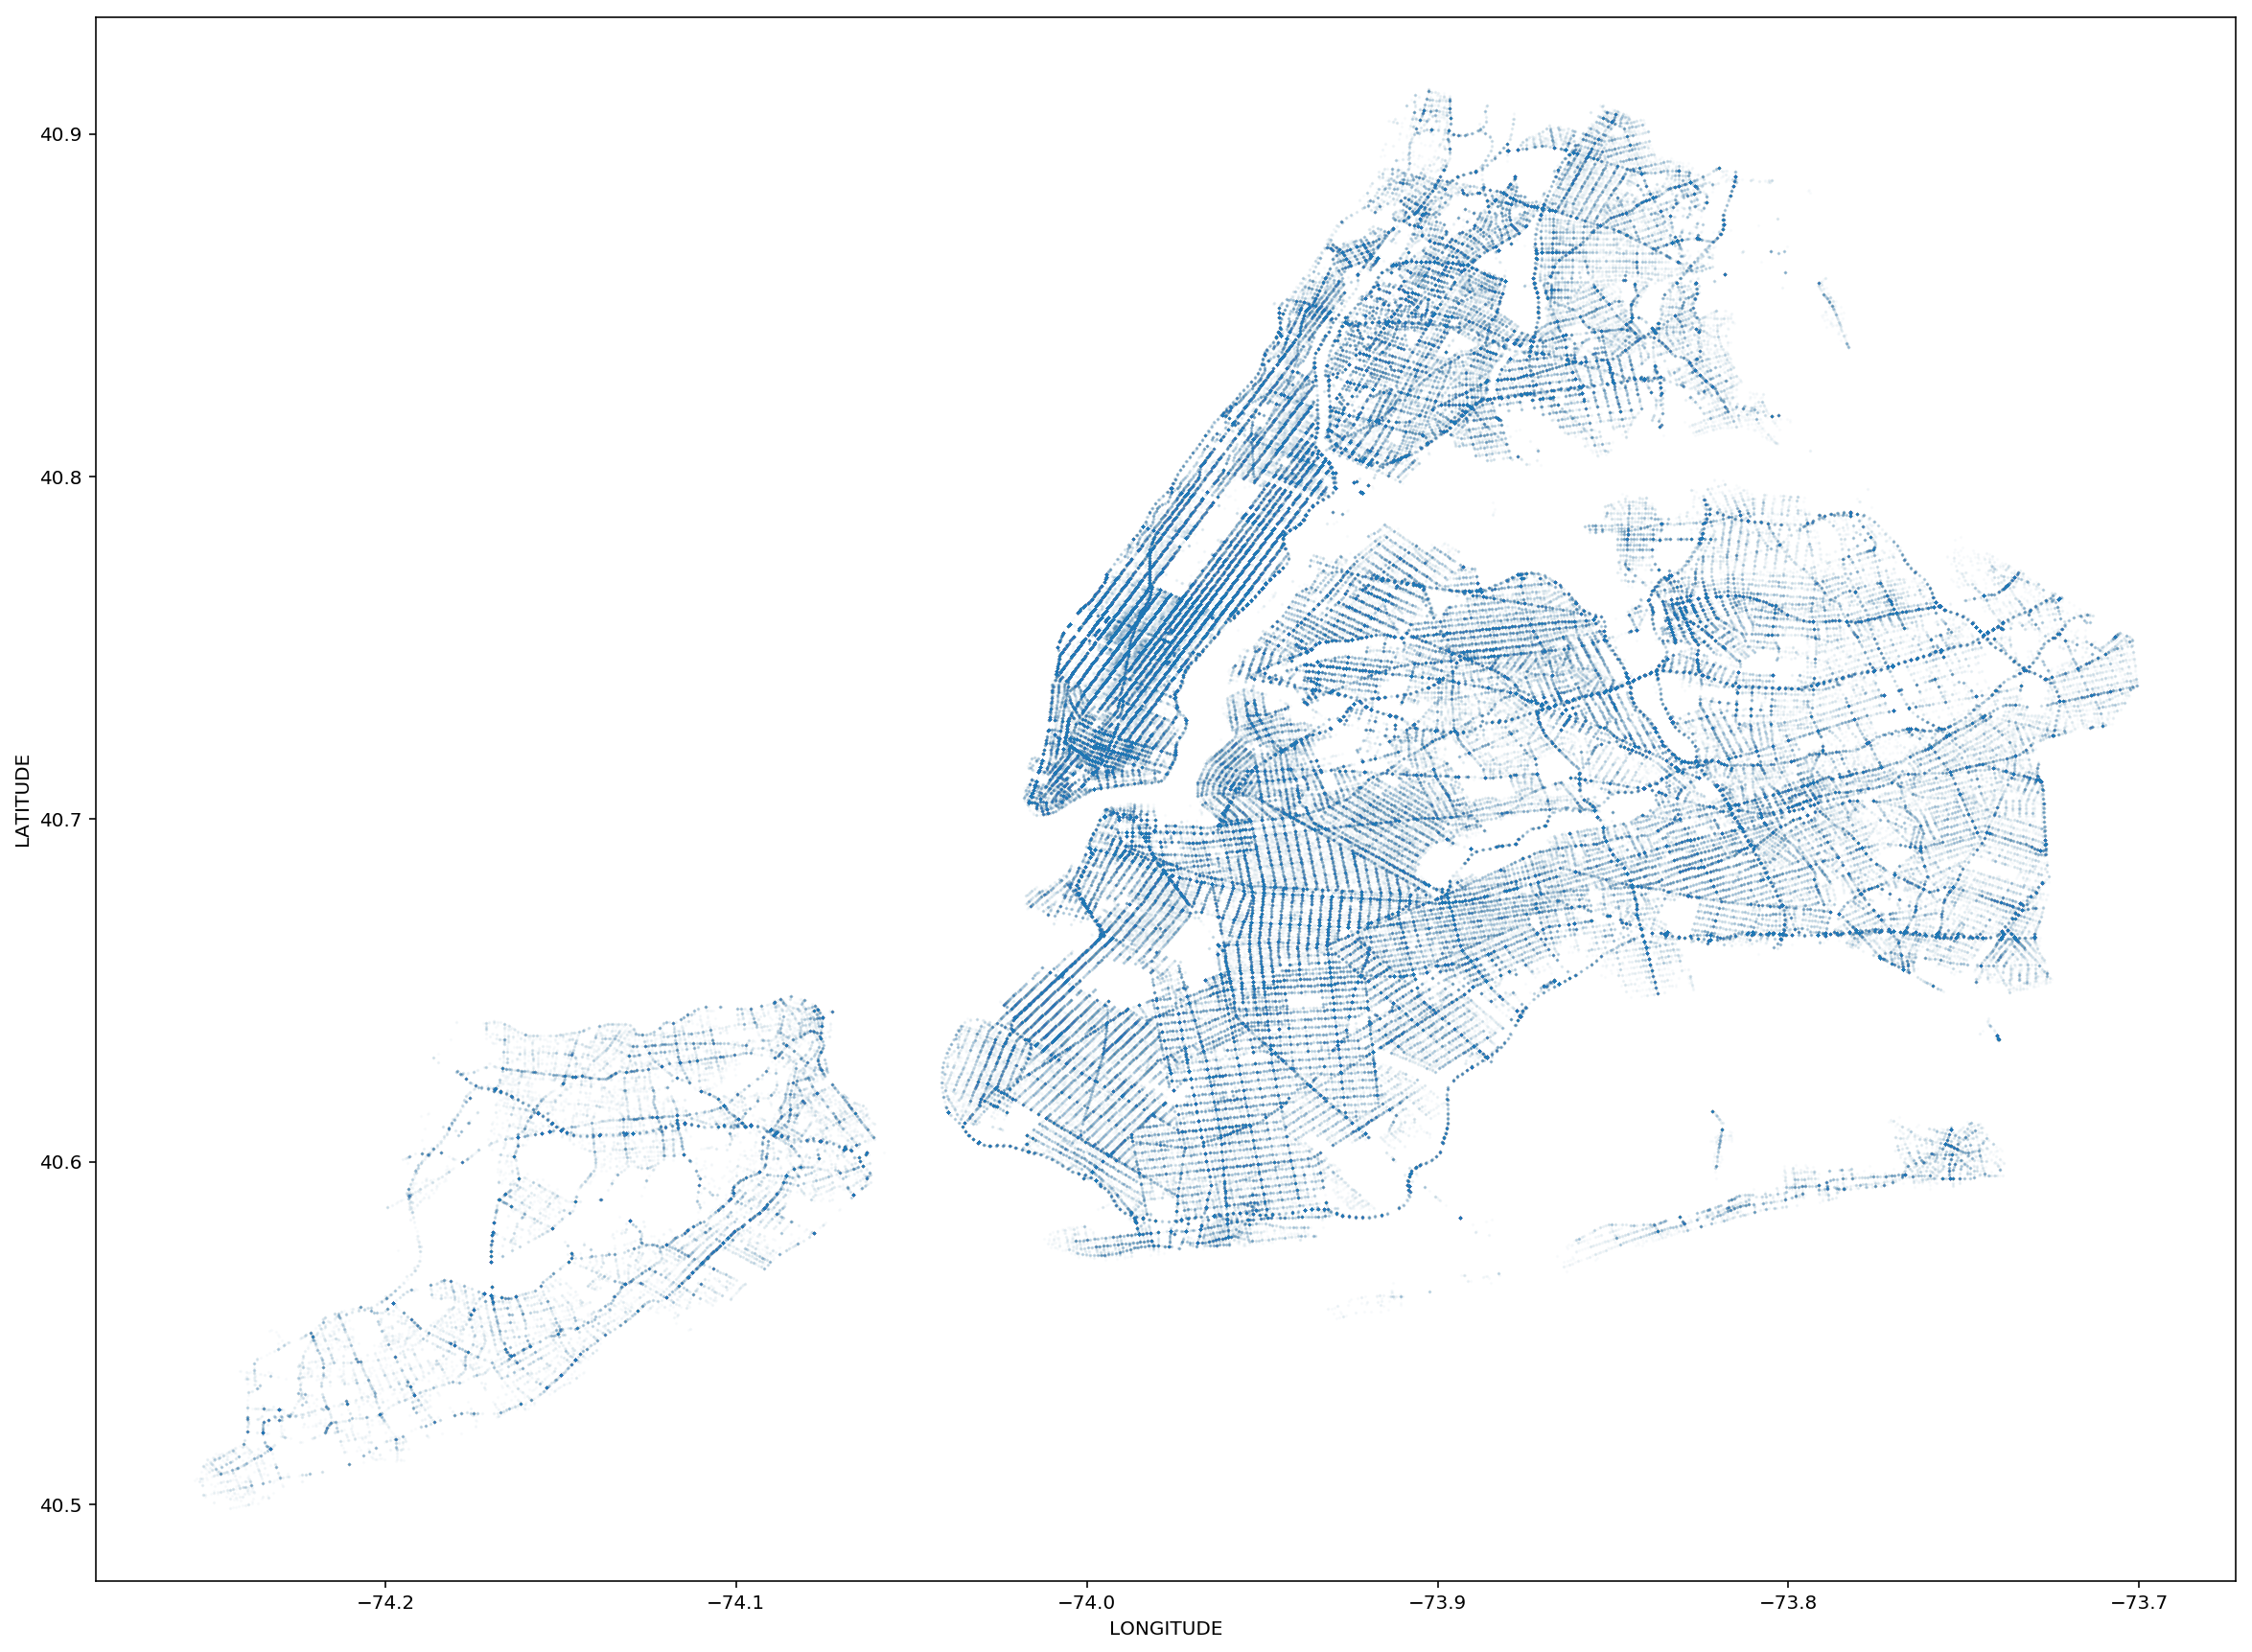

In [128]:
final_df.plot.scatter(x='LONGITUDE', y='LATITUDE',figsize=(20,15), s=0.5, alpha=0.02)

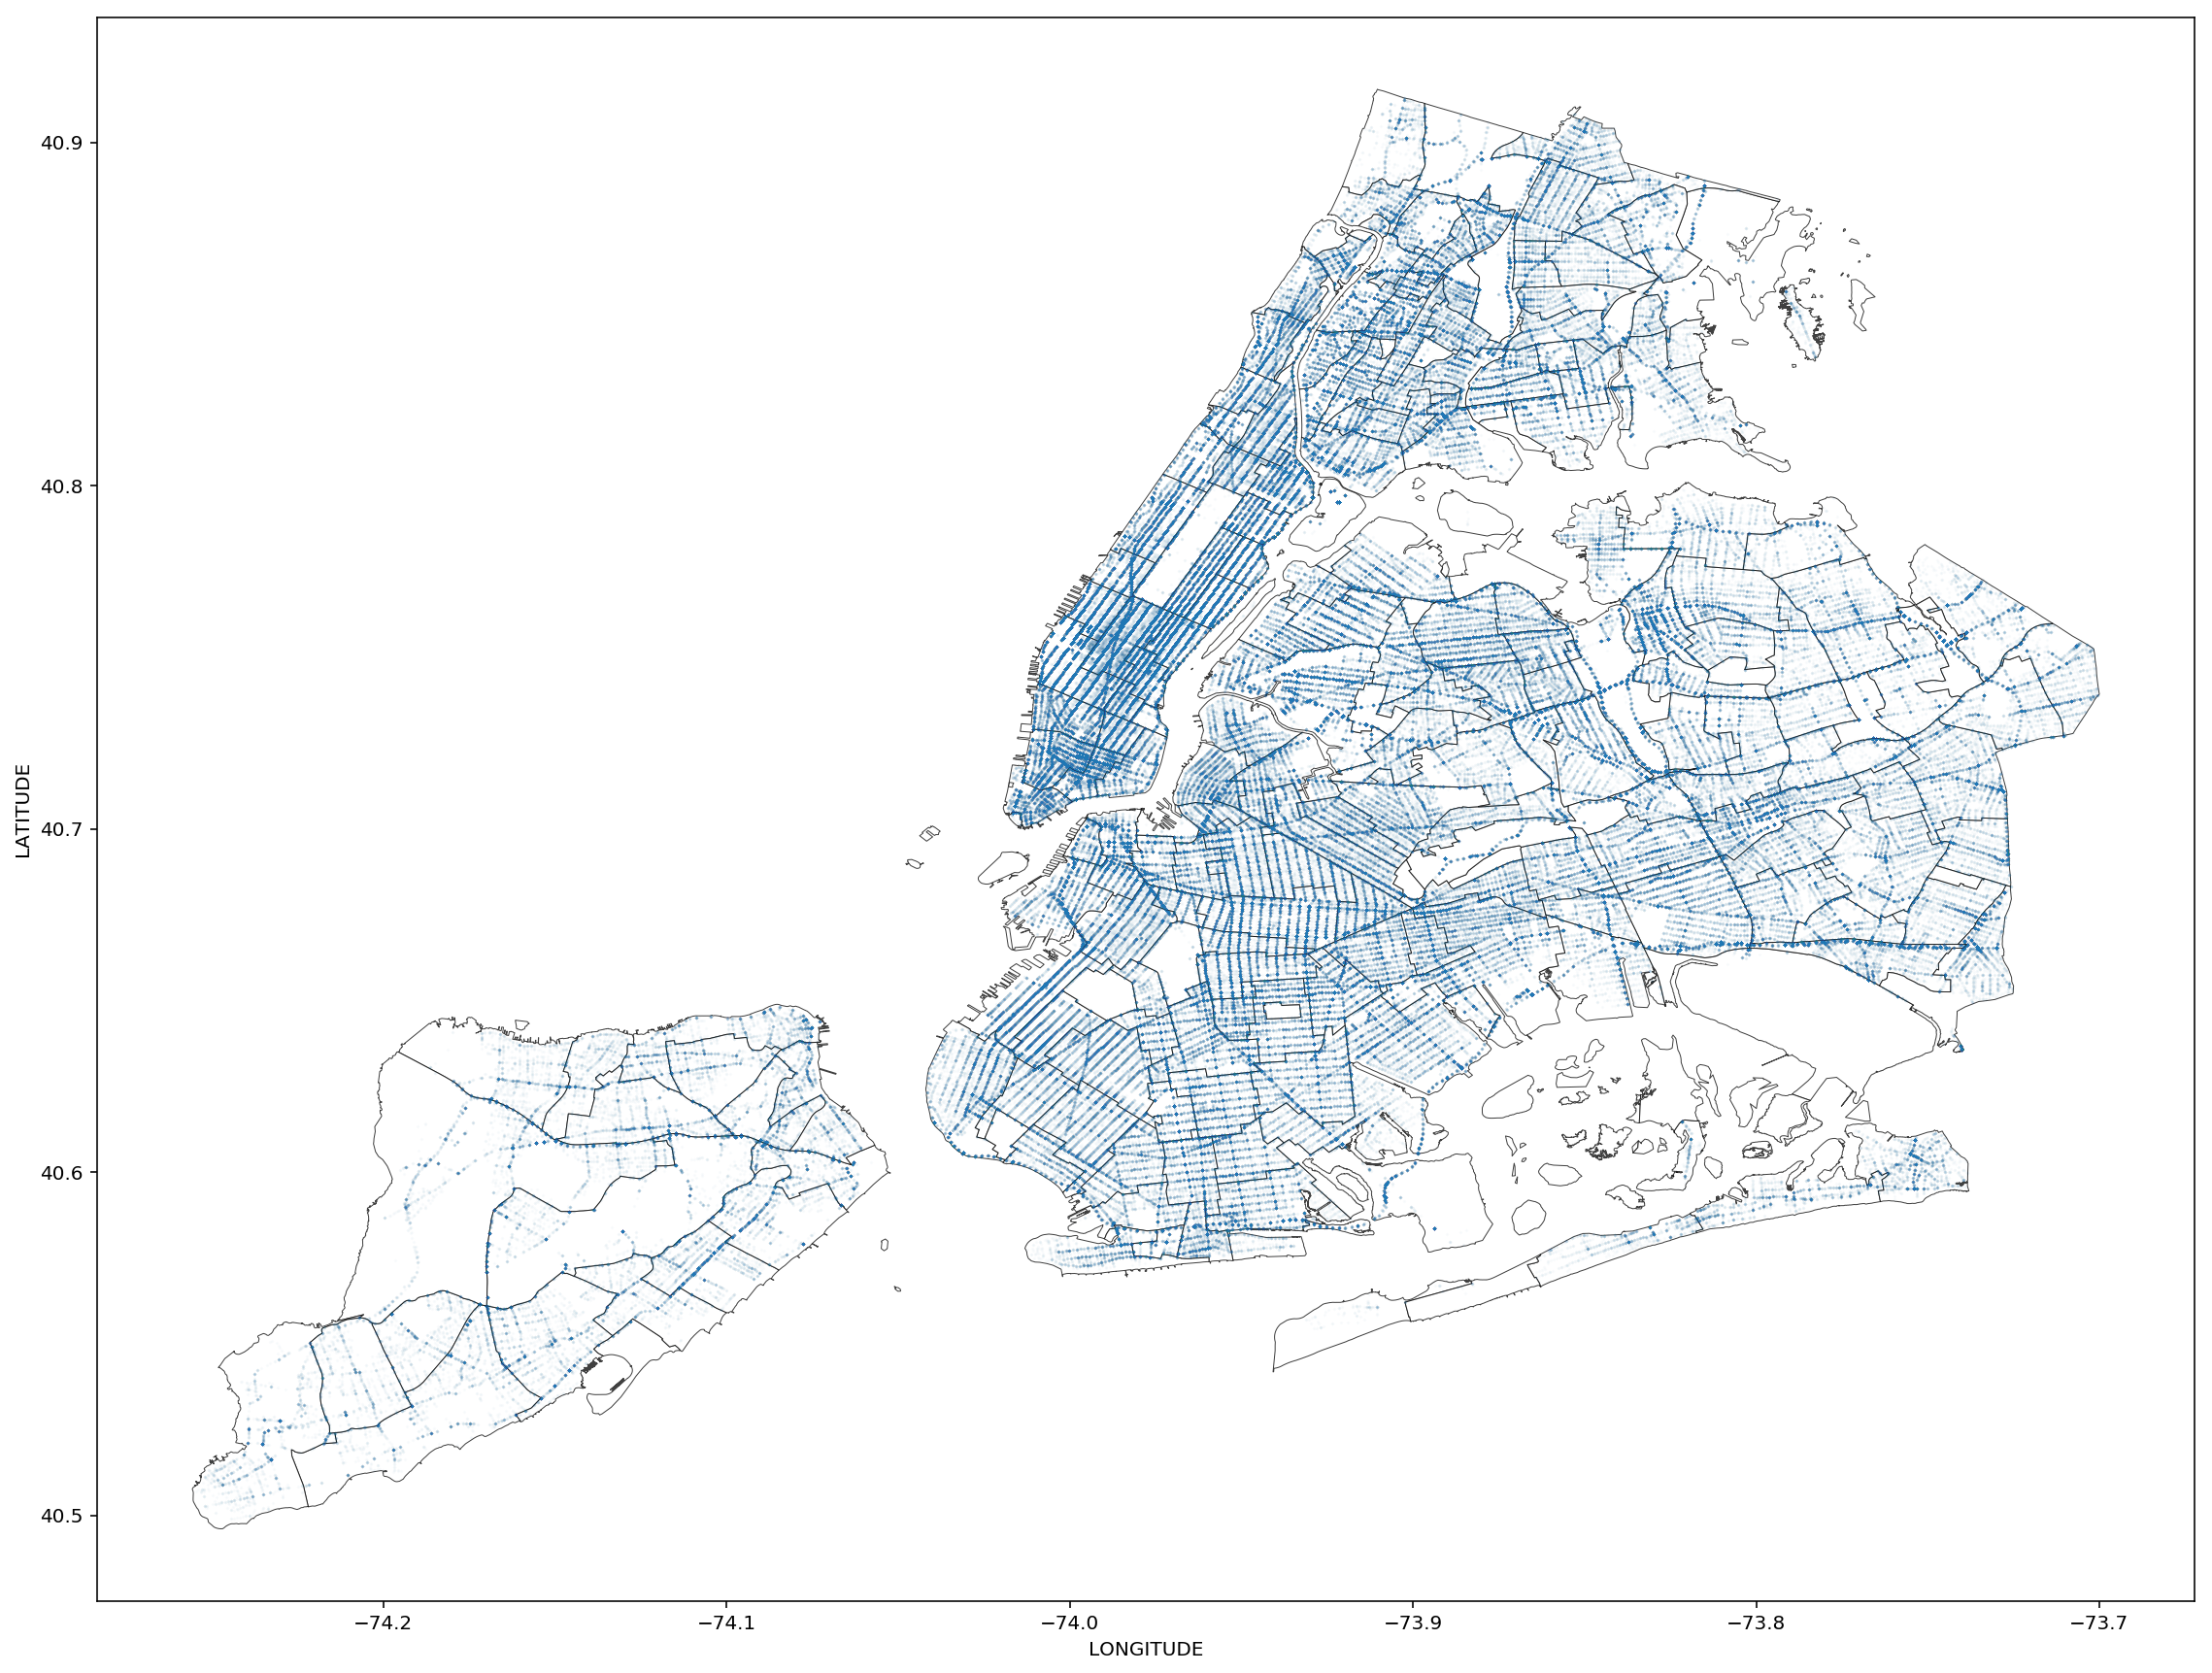

In [129]:
base = df_nyc.plot(
    linewidth=0.5,
    color='White',
    edgecolor='Black',
    figsize=(20, 15),
    alpha=0.75)

scatterplot = final_df.plot(
    kind='scatter',
    x='LONGITUDE',
    y='LATITUDE',
    s=0.5,
    alpha=0.02,
    ax=base)

In [130]:
final_df.to_csv('collisions.csv.gz', index=False, compression='gzip')

## TODO

* Examine the contents of Contributing factor and Vehicle type. Replace noisy values with UNSPECIFIED
* 
* Normalize Contributing factor and Vehicle type, and split results in a separate table. Create MySQL/SQLite database with proper normalization.

* Add a column "NUM_VEHICLES" to show the number of vehicles involved in the accident. Check that we do not have NaNs before a real value in CAUSE and in VEHICLE TYPE, and that the two columns (CAUSE AND VEHICLE) agree in the number.

In [49]:
fdf = final_df.set_index("UNIQUE_KEY")

In [50]:
cols = [fdf.CAUSE_VEHICLE_1, fdf.CAUSE_VEHICLE_2, fdf.CAUSE_VEHICLE_3, fdf.CAUSE_VEHICLE_4, fdf.CAUSE_VEHICLE_5]
causes = pd.concat( cols ).dropna()

In [51]:
# We replace noisy causes with UNSPECIFIED and not with NaN, as NaN is used to mean "no vehicle"
import numpy as np
causes = causes.replace(to_replace='1', value='UNSPECIFIED')
causes = causes.replace(to_replace='80', value='UNSPECIFIED')
causes = causes.replace(to_replace='ILLNES', value='ILLNESS')

In [78]:
causes.value_counts().sort_index()

ACCELERATOR DEFECTIVE                                        582
AGGRESSIVE DRIVING/ROAD RAGE                                4860
ALCOHOL INVOLVEMENT                                        11187
ANIMALS ACTION                                               781
BACKING UNSAFELY                                           45603
BRAKES DEFECTIVE                                            3449
CELL PHONE (HAND-HELD)                                       279
CELL PHONE (HANDS-FREE)                                      225
DRIVER INATTENTION/DISTRACTION                            235798
DRIVER INEXPERIENCE                                        19967
DRIVERLESS/RUNAWAY VEHICLE                                   500
DRUGS (ILLEGAL)                                              742
EATING OR DRINKING                                            12
FAILURE TO KEEP RIGHT                                       2479
FAILURE TO YIELD RIGHT-OF-WAY                              70599
FATIGUED/DROWSY          

In [79]:
cols = [fdf.TYPE_VEHICLE_1, fdf.TYPE_VEHICLE_2, fdf.TYPE_VEHICLE_3, fdf.TYPE_VEHICLE_4, fdf.TYPE_VEHICLE_5]

# cols = [fdf.TYPE_VEHICLE_4] # , fdf.TYPE_VEHICLE_2, fdf.TYPE_VEHICLE_3, fdf.TYPE_VEHICLE_4, fdf.TYPE_VEHICLE_5]

types = pd.concat( cols ).dropna()

In [80]:
types = types.replace(to_replace='STATION WAGON/SPORT UTILITY VEHICLE', value='SPORT UTILITY / STATION WAGON')
types = types.replace(to_replace='BU', value='BUS')
types = types.replace(to_replace='CONV', value='CONVERTIBLE')